# A Monte Carlo vs Quasi-Monte Carlo Comparison

Monte Carlo algorithms work on independent identically distributed (IID) points while Quasi-Monte Carlo algorithms work on low discrepancy (LD) sequences. LD generators, such as those for the lattice and Sobol' sequences, provide samples whose space filling properties can be exploited by Quasi-Monte Carlo algorithms.

[![Open In Colab](https://colab.research.google.com/assets/colab-badge.svg)](https://colab.research.google.com/github/QMCSoftware/QMCSoftware/blob/develop/demos/MC_vs_QMC.ipynb)

In [1]:
import pandas as pd
pd.options.display.float_format = '{:.2e}'.format
from matplotlib import pyplot as plt
import matplotlib
%matplotlib inline

plt.rc('font', size=16)          # controls default text sizes
plt.rc('axes', titlesize=16)     # fontsize of the axes title
plt.rc('axes', labelsize=16)    # fontsize of the x and y labels
plt.rc('xtick', labelsize=16)    # fontsize of the tick labels
plt.rc('ytick', labelsize=16)    # fontsize of the tick labels
plt.rc('legend', fontsize=16)    # legend fontsize
plt.rc('figure', titlesize=16)  # fontsize of the figure title

## Vary Absolute Tolerance

<b>Testing Parameters</b><br>
- relative tolerance = 0
- Results averaged over 3 trials

Keister Integrand
- $y_i = \pi^{d/2} \cos(||\boldsymbol{x}_i||_2)$
- $d=3$

Gaussian True Measure
- $\mathcal{N}(\boldsymbol{0},\boldsymbol{I}/2)$
<br>

In [2]:
df = pd.read_csv('../workouts/mc_vs_qmc/out/vary_abs_tol.csv')
df['Problem'] = df['Stopping Criterion'] + ' ' + df['Distribution'] + ' (' + df['MC/QMC'] + ')'
df = df.drop(['Stopping Criterion','Distribution','MC/QMC'],axis=1)
problems = ['CubMCCLT IIDStdUniform (MC)',
            'CubMCG IIDStdUniform (MC)',
            'CubQMCCLT Sobol (QMC)',
            'CubQMCLatticeG Lattice (QMC)',
            'CubQMCSobolG Sobol (QMC)']
df = df[df['Problem'].isin(problems)]
df['abs_tol'] = df['abs_tol'].round(4)
df_grouped = df.groupby(['Problem'])
df_abs_tols = df_grouped['abs_tol'].apply(list).reset_index(name='abs_tol')
df_samples = df_grouped['n_samples'].apply(list).reset_index(name='n')
df_times = df.groupby(['Problem'])['time'].apply(list).reset_index(name='time')
df[df['abs_tol'].isin([.01,.05,.1])].set_index('Problem')

,abs_tol,solution,n_samples,time
Problem,,,,
CubMCCLT IIDStdUniform (MC),1.00e-02,2.17e+00,4.90e+05,9.05e-02
CubMCCLT IIDStdUniform (MC),5.00e-02,2.14e+00,2.16e+04,5.49e-03
CubMCCLT IIDStdUniform (MC),1.00e-01,2.15e+00,6.93e+03,2.50e-03
CubMCG IIDStdUniform (MC),1.00e-02,2.17e+00,6.27e+05,1.11e-01
CubMCG IIDStdUniform (MC),5.00e-02,2.14e+00,4.09e+04,8.46e-03
CubMCG IIDStdUniform (MC),1.00e-01,2.14e+00,1.48e+04,5.97e-03
CubQMCCLT Sobol (QMC),1.00e-02,2.17e+00,4.10e+03,3.89e-03
CubQMCCLT Sobol (QMC),5.00e-02,2.17e+00,4.10e+03,3.14e-03
CubQMCCLT Sobol (QMC),1.00e-01,2.17e+00,4.10e+03,3.11e-03


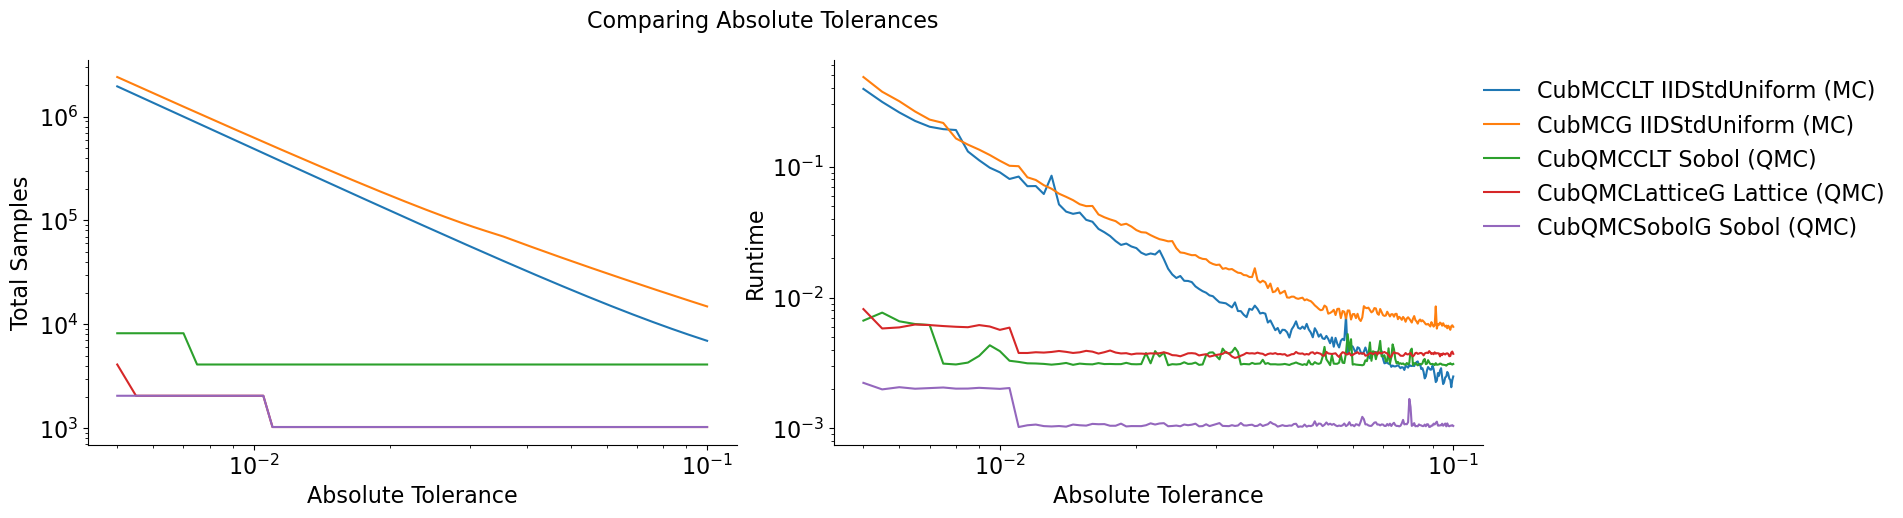

In [3]:
fig,ax = plt.subplots(nrows=1, ncols=2, figsize=(18, 5))
for problem in problems:
    abs_tols = df_abs_tols[df_abs_tols['Problem']==problem]['abs_tol'].tolist()[0]
    samples = df_samples[df_samples['Problem']==problem]['n'].tolist()[0]
    times = df_times[df_times['Problem']==problem]['time'].tolist()[0]
    ax[0].plot(abs_tols,samples,label=problem)
    ax[1].plot(abs_tols,times,label=problem)
for ax_i in ax:
    ax_i.set_xscale('log', base=10)
    ax_i.set_yscale('log', base=10)
    ax_i.spines['right'].set_visible(False)
    ax_i.spines['top'].set_visible(False)
    ax_i.set_xlabel('Absolute Tolerance')
ax[0].legend(loc='upper right', frameon=False,ncol=1,bbox_to_anchor=(2.8,1))
ax[0].set_ylabel('Total Samples')
ax[1].set_ylabel('Runtime')
fig.suptitle('Comparing Absolute Tolerances')
plt.subplots_adjust(wspace=.15, hspace=0);

Quasi-Monte Carlo takes less time and fewer samples to achieve the same accuracy as regular Monte Carlo<br>
The  number of points for Monte Carlo algorithms is $\mathcal{O}(1/\epsilon^2)$ while quasi-Monte Carlo algorithms can be as efficient as $\mathcal{O}(1/\epsilon)$

## Vary Dimension
<b>Testing Parameters</b><br>
- absolute tolerance = 0
- relative tolerance = .01
- Results averaged over 3 trials

Keister Integrand
- $y_i = \pi^{d/2} \cos(||\boldsymbol{x}_i||_2)$

Gaussian True Measure
- $\mathcal{N}(\boldsymbol{0},\boldsymbol{I}/2)$
<br>

In [4]:
df = pd.read_csv('../workouts/mc_vs_qmc/out/vary_dimension.csv')
df['Problem'] = df['Stopping Criterion'] + ' ' + df['Distribution'] + ' (' + df['MC/QMC'] + ')'
df = df.drop(['Stopping Criterion','Distribution','MC/QMC'],axis=1)
problems = ['CubMCCLT IIDStdUniform (MC)',
            'CubMCG IIDStdUniform (MC)',
            'CubQMCCLT Sobol (QMC)',
            'CubQMCLatticeG Lattice (QMC)',
            'CubQMCSobolG Sobol (QMC)']
df = df[df['Problem'].isin(problems)]
df_grouped = df.groupby(['Problem'])
df_dims = df_grouped['dimension'].apply(list).reset_index(name='dimension')
df_samples = df_grouped['n_samples'].apply(list).reset_index(name='n')
df_times = df.groupby(['Problem'])['time'].apply(list).reset_index(name='time')
df[df['dimension'].isin([10,30])].set_index('Problem')

,dimension,solution,n_samples,time
Problem,,,,
CubMCCLT IIDStdUniform (MC),10,-1.55e+02,5.04e+04,2.80e-02
CubMCCLT IIDStdUniform (MC),30,-1.94e+07,2.37e+04,4.05e-02
CubMCG IIDStdUniform (MC),10,-1.56e+02,1.10e+04,7.36e-03
CubMCG IIDStdUniform (MC),30,-1.94e+07,1.10e+04,2.00e-02
CubQMCCLT Sobol (QMC),10,-1.54e+02,8.19e+03,7.91e-03
CubQMCCLT Sobol (QMC),30,-1.94e+07,4.10e+03,7.15e-03
CubQMCLatticeG Lattice (QMC),10,-1.55e+02,1.02e+03,4.40e-03
CubQMCLatticeG Lattice (QMC),30,-1.94e+07,1.02e+03,5.54e-03
CubQMCSobolG Sobol (QMC),10,-1.54e+02,1.02e+03,1.36e-03


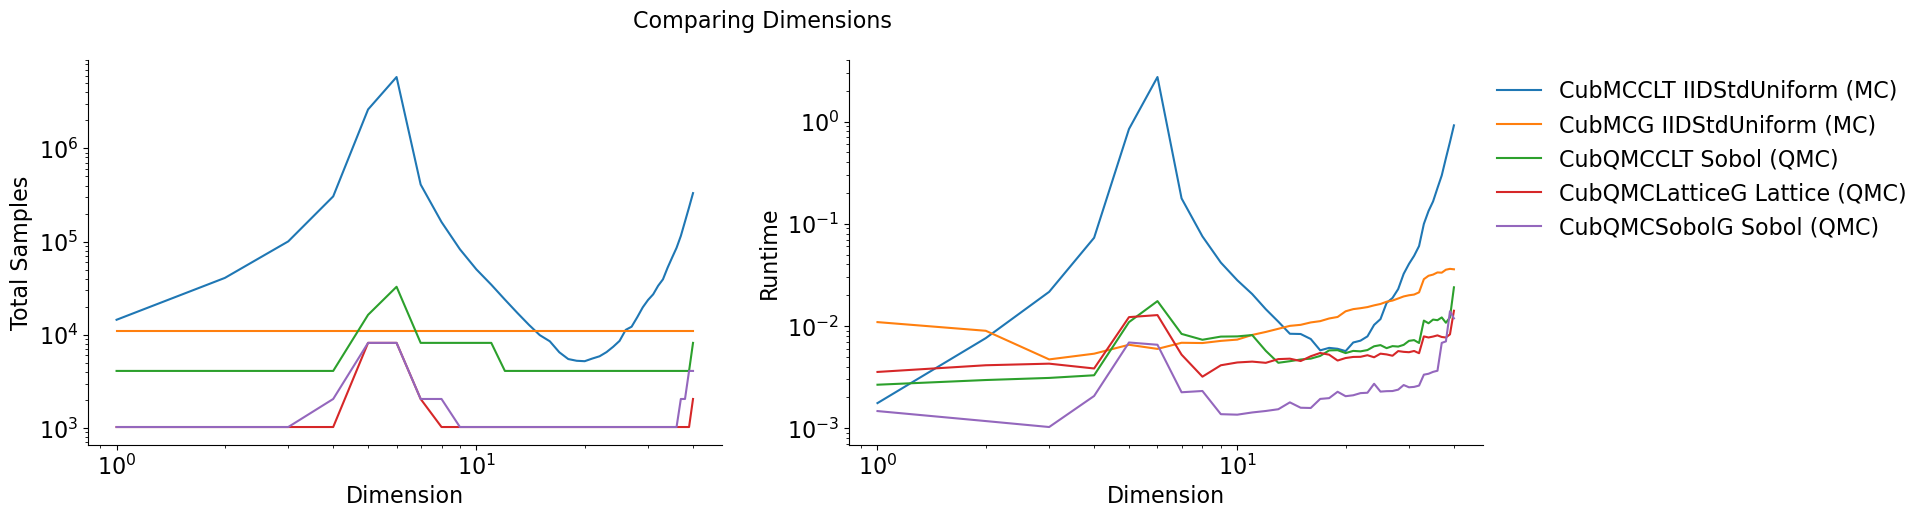

In [5]:
fig,ax = plt.subplots(nrows=1, ncols=2, figsize=(18, 5))
for problem in problems:
    dimension = df_dims[df_dims['Problem']==problem]['dimension'].tolist()[0]
    samples = df_samples[df_samples['Problem']==problem]['n'].tolist()[0]
    times = df_times[df_times['Problem']==problem]['time'].tolist()[0]
    ax[0].plot(dimension,samples,label=problem)
    ax[1].plot(dimension,times,label=problem)
for ax_i in ax:
    ax_i.set_xscale('log', base=10)
    ax_i.set_yscale('log', base=10)
    ax_i.spines['right'].set_visible(False)
    ax_i.spines['top'].set_visible(False)
    ax_i.set_xlabel('Dimension')
ax[0].legend(loc='upper right', frameon=False,ncol=1,bbox_to_anchor=(2.9,1))
ax[0].set_ylabel('Total Samples')
ax[1].set_ylabel('Runtime')
fig.suptitle('Comparing Dimensions');